# 1A.data - Visualisation des données

Les tableaux et les graphes sont deux outils incontournables des statisticiens. Petite revue des graphes.

In [1]:
%matplotlib inline

Cette instruction fait apparaître les graphes dans le notebook. Si ce n'est pas le cas, il faut la réexécuer. Les deux lignes suivantes permettent de vérifier où matplotlib a prévu d'afficher ses résultats. Pour un notebook, cela doit être ``'nbAgg'`` ou ``'module://ipykernel.pylab.backend_inline'``.

In [2]:
import matplotlib
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [4]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Matplotlib, pandas

### Récupération des données

On récupère les données disponibles sur le site de l'INSEE : [Naissance, décès, mariages 2012](http://www.insee.fr/fr/themes/detail.asp?ref_id=fd-etatcivil2012&page=fichiers_detail/etatcivil2012/doc/documentation.htm). Il s'agit de récupérer la liste des mariages de l'année 2012. On souhaite représenter le graphe du nombre de mariages en fonction de l'écart entre les mariés.

In [5]:
from urllib.error import URLError
import pyensae.datasource
from pyensae.datasource import dBase2df, DownloadDataException
files = ["etatcivil2012_nais2012_dbase.zip",
         "etatcivil2012_dec2012_dbase.zip",
         "etatcivil2012_mar2012_dbase.zip" ]

try:
    pyensae.datasource.download_data(files[-1], 
                          website='http://telechargement.insee.fr/fichiersdetail/etatcivil2012/dbase/')
except (DownloadDataException, URLError, TimeoutError):
    # backup plan
    pyensae.datasource.download_data(files[-1], website="xd")

df = dBase2df("mar2012.dbf")
df.shape, df.columns

((246123, 16),
 Index(['ANAISH', 'DEPNAISH', 'INDNATH', 'ETAMATH', 'ANAISF', 'DEPNAISF',
        'INDNATF', 'ETAMATF', 'AMAR', 'MMAR', 'JSEMAINE', 'DEPMAR', 'DEPDOM',
        'TUDOM', 'TUCOM', 'NBENFCOM'],
       dtype='object'))

In [6]:
df.head()

,ANAISH,DEPNAISH,INDNATH,ETAMATH,ANAISF,DEPNAISF,INDNATF,ETAMATF,AMAR,MMAR,JSEMAINE,DEPMAR,DEPDOM,TUDOM,TUCOM,NBENFCOM
0,1982,75,1,1,1984,99,2,1,2012,01,1,29,99,9,,N
1,1956,69,2,4,1969,99,2,4,2012,01,3,75,99,9,,N
2,1982,99,2,1,1992,99,1,1,2012,01,5,34,99,9,,N
3,1985,99,2,1,1987,84,1,1,2012,01,4,13,99,9,,N
4,1968,99,2,1,1963,99,2,1,2012,01,6,26,99,9,,N


On récupère de la même manière la signification des variables :

In [7]:
from pyensae.datasource import dBase2df
vardf = dBase2df("varlist_mariages.dbf")
vardf.shape, vardf.columns

((16, 4), Index(['VARIABLE', 'LIBELLE', 'TYPE', 'LONGUEUR'], dtype='object'))

In [8]:
vardf

,VARIABLE,LIBELLE,TYPE,LONGUEUR
0,AMAR,Année du mariage,CHAR,4
1,ANAISF,Année de naissance de l'épouse,CHAR,4
2,ANAISH,Année de naissance de l'époux,CHAR,4
3,DEPDOM,Département de domicile après le mariage,CHAR,3
4,DEPMAR,Département de mariage,CHAR,3
5,DEPNAISF,Département de naissance de l'épouse,CHAR,3
6,DEPNAISH,Département de naissance de l'époux,CHAR,3
7,ETAMATF,État matrimonial antérieur de l'épouse,CHAR,1
8,ETAMATH,État matrimonial antérieur de l'époux,CHAR,1
9,INDNATF,Indicateur de nationalité de l'épouse,CHAR,1


### Exercice 1 : écart entre les mariés

1. En ajoutant une colonne et en utilisant l'opération [group by](http://pandas.pydata.org/pandas-docs/stable/groupby.html), on veut obtenir la distribution du nombre de mariages en fonction de l'écart entre les mariés. Au besoin, on changera le type d'une colone ou deux.
2. On veut tracer un nuage de points avec en abscisse l'âge du mari, en ordonnée, l'âge de la femme. Il faudra peut-être jeter un coup d'oeil sur la documentation de la méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html).

In [9]:
# df["colonne"] = df.apply (lambda r:  int(r["colonne"]), axis=1)  # pour changer de type
# df["difference"] = ...

### Exercice 2 : graphe de la distribution avec pandas

Le module ``pandas`` propose un panel de graphiques standard faciles à obtenir. On souhaite représenter la distribution sous forme d'histogramme. A vous de choisir le meilleure graphique depuis la page [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

In [10]:
# df.plot(...)

### matplotlib

[matplotlib](http://matplotlib.org/) est le module qu'utilise [pandas](http://pandas.pydata.org/). Ainsi, la méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) retourne un objet de type [Axes](http://matplotlib.org/api/axes_api.html#module-matplotlib.axes) qu'on peut modifier par la suite via les [méthodes suivantes](http://matplotlib.org/api/pyplot_summary.html). On peut ajouter un titre avec [set_title](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_title) ou ajouter une grille avec [grid](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.grid). On peut également superposer [deux courbes sur le même graphique](http://stackoverflow.com/questions/19941685/how-to-show-a-bar-and-line-graph-on-the-same-plot), ou [changer de taille de caractères](http://stackoverflow.com/questions/12444716/how-do-i-set-figure-title-and-axes-labels-font-size-in-matplotlib). Le code suivant trace le nombre de mariages par département.

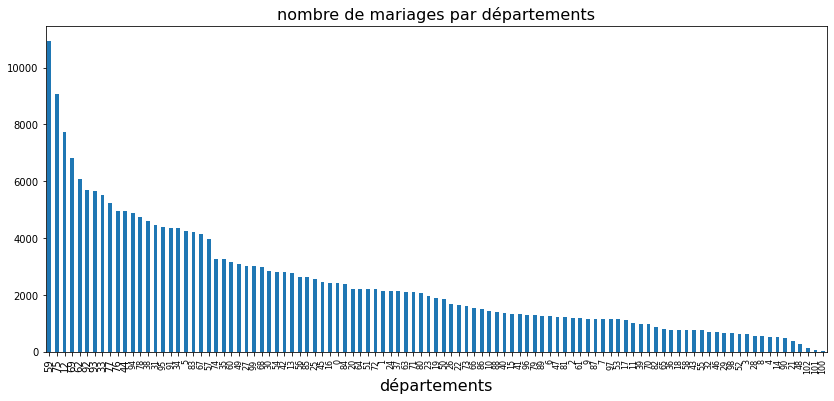

In [11]:
df["nb"] = 1
dep = df[["DEPMAR","nb"]].groupby("DEPMAR", as_index=False).sum().sort_values("nb",ascending=False)
ax = dep.plot(kind = "bar", figsize=(14,6))
ax.set_xlabel("départements", fontsize=16)
ax.set_title("nombre de mariages par départements", fontsize=16)
ax.legend().set_visible(False)  # on supprime la légende

# on change la taille de police de certains labels
for i,tick in enumerate(ax.xaxis.get_major_ticks()):
    if i > 10 :
        tick.label.set_fontsize(8)

Quand on ne sait pas, le plus simple est d'utiliser un moteur de recherche avec un requête du type : ``matplotlib + requête``. Pour créer un graphique, le plus courant est de choisir le graphique le plus ressemblant d'une [gallerie de graphes](http://matplotlib.org/gallery.html) puis de l'adapter à vos données.

### Exercice 3 : distribution des mariages par jour
    
On veut obtenir un graphe qui contient l'histogramme de la distribution du nombre de mariages par jour de la semaine et d'ajouter une seconde courbe correspond avec un second axe à la répartition cumulée.

## Réseaux, graphes

### networkx

Le module [networkx](https://networkx.github.io/) permet de représenter un réseau ou un graphe de petite taille (< 500 noeuds). Un graphe est défini par un ensemble de noeuds (ou *vertex* en anglais) reliés par des arcs (ou *edge* en anglais). La [gallerie](http://networkx.github.io/documentation/latest/gallery.html) vous donnera une idée de ce que le module est capable de faire.

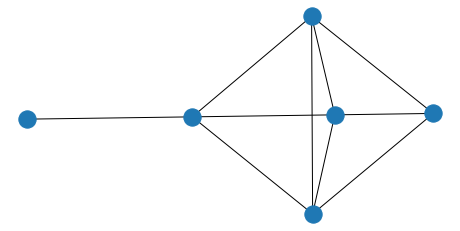

In [13]:
import random
import networkx as nx
G=nx.Graph()
for i in range(15) :
    G.add_edge ( random.randint(0,5),  random.randint(0,5) )

import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,4))
nx.draw(G, ax = ax)

### Graphviz

[Graphviz](http://www.graphviz.org/) est un outil développé depuis plusieurs années déjà qui permet de réprésenter des graphes plus conséquents (> 500 noeuds). Il propose un choix plus riche de graphes : [gallerie](http://www.graphviz.org/Gallery.php). Il est utilisable via le module [graphviz](https://pypi.python.org/pypi/graphviz). Son installation requiert l'installation de l'outil [Graphviz](http://www.graphviz.org/) qui n'est pas inclus. La différence entre les deux modules tient dans l'algorithme utilisé pour assigner des coordonnées à chaque noeud du graphe de façon à ce que ses arcs se croisent le moins possibles. Au delà d'une certaine taille, le dessin de graphe n'est plus lisible et nécessite quelques tatônnements. Cela peut passer par une clusterisation du graphe (voir la [méthode Louvain](http://perso.uclouvain.be/vincent.blondel/research/louvain.html)) de façon à colorer certains noeuds proches voire à les regrouper.

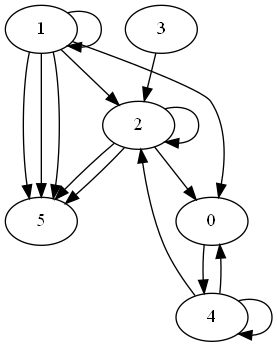

In [14]:
import random, os
from graphviz import Digraph
from IPython.display import Image
from pyquickhelper.helpgen import find_graphviz_dot
bin = os.path.dirname(find_graphviz_dot())
if bin not in os.environ["PATH"]:
    os.environ["PATH"] = os.environ["PATH"] + ";" + bin

dot = Digraph(comment='random graph', format="png")
for i in range(15) :
    dot.edge ( str(random.randint(0,5)),  str(random.randint(0,5)) )

img = dot.render('t_random_graph.gv')
Image(img)

### Exercice 4 : dessin d'un graphe avec networkx
    
On construit un graphe aléatoire, ses 20 arcs sont obtenus en tirant 20 fois deux nombres entiers entre 1 et 10. Chaque arc doit avoir une épaisseur aléatoire. On regardera les fonctions [spring_layout](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.layout.spring_layout.html?highlight=spring_layout#networkx.drawing.layout.spring_layout), [draw_networkx_nodes](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html?highlight=draw_networkx_nodes#networkx.drawing.nx_pylab.draw_networkx_nodes), [draw_networkx_edges](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html?highlight=draw_networkx_edges#networkx.drawing.nx_pylab.draw_networkx_edges). La [gallerie](https://networkx.github.io/documentation/latest/gallery.html) peut aider aussi.